# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [8]:
states = pd.read_csv('states_edu.csv')
states.head

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [14]:
# @@@ 1
# Your Code
years = np.ptp(states['YEAR'])
years

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [16]:
# @@@ 2
mi = states[states['STATE']=='MICHIGAN']
miMean = mi['AVG_MATH_4_SCORE'].mean()
oh = states[states['STATE']=='OHIO']
ohMean = oh['AVG_MATH_4_SCORE'].mean()
print(miMean)
print(ohMean)

234.36363636363637
239.45454545454547


Find the average for your chosen test across all states in 2019

In [18]:
# @@@ 3
scores2019 = states[states['YEAR'] == 2019]
avg2019 = scores2019['AVG_MATH_4_SCORE'].mean()
print(avg2019)

239.9433962264151


For each state, find a maximum value for your chosen test score

In [20]:
# @@@ 4
states.groupby('STATE')['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [23]:
# @@@ 5
states['instructionexp_vs_totalexp'] = states['INSTRUCTION_EXPENDITURE'] / states['TOTAL_EXPENDITURE']
states['instructionexp_vs_totalexp']

0       0.558333
1       0.512461
2       0.422130
3       0.553248
4       0.529091
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: instructionexp_vs_totalexp, Length: 1715, dtype: float64

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
I made this feature to understand how much funding the school was putting in to instruction, as I have a prediction that the higher the services expenditure, the higher the scores will be.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='LOCAL_REVENUE'>

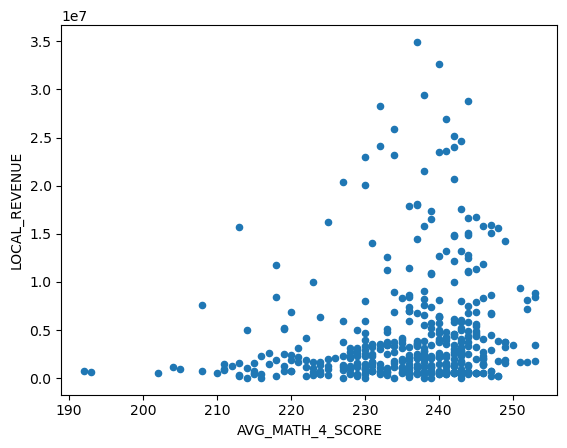

In [26]:
# @@@ 6
states.plot.scatter(x='AVG_MATH_4_SCORE',y='LOCAL_REVENUE')

**Correlation between 4th grade math scores and local revenue**

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='INSTRUCTION_EXPENDITURE'>

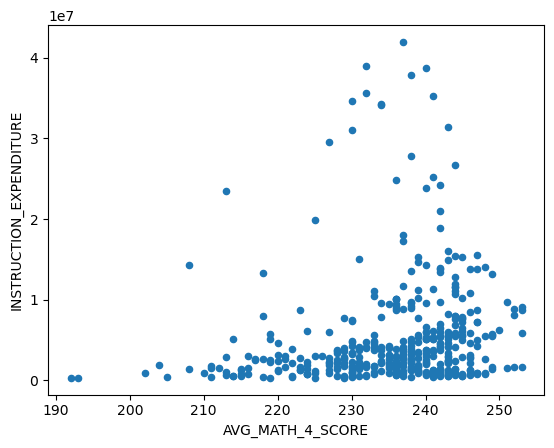

In [29]:
# @@@ 7
states.plot.scatter(x='AVG_MATH_4_SCORE',y='INSTRUCTION_EXPENDITURE')

**Correlation between average 4th grade math scores and instruction expenditure**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# @@@ 8

x = states[['GRADES_8_G','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = states.loc[x.index]['AVG_READING_8_SCORE']
y.fillna(y.median(), inplace=True)

In [34]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [37]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [38]:
# @@@ 11
# create your model here
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [69]:
# @@@ 12
np.mean(model.predict(X_test)-y_test)

-0.30802082348323595

In [72]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

4.521541990227581

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

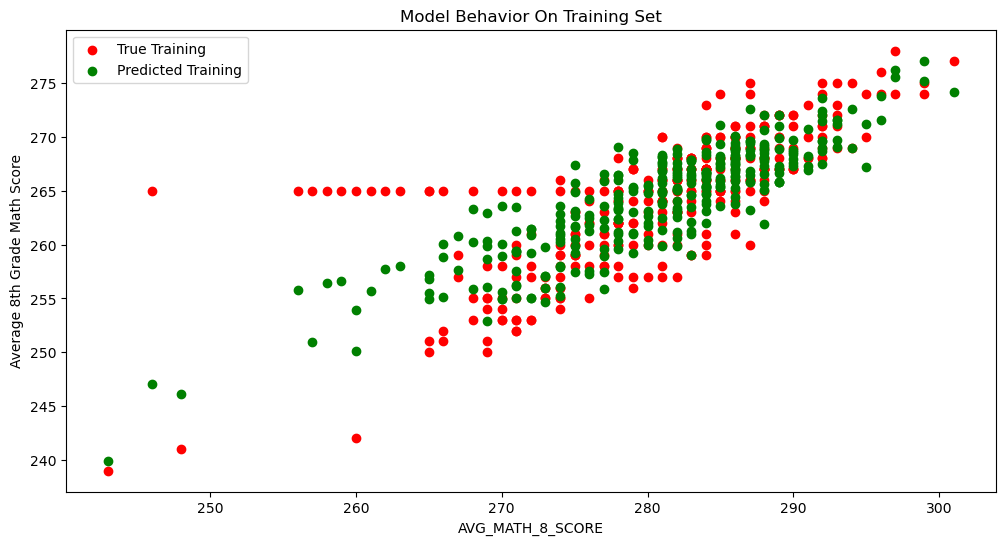

In [82]:
# @@@ 13

col_name = 'AVG_MATH_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

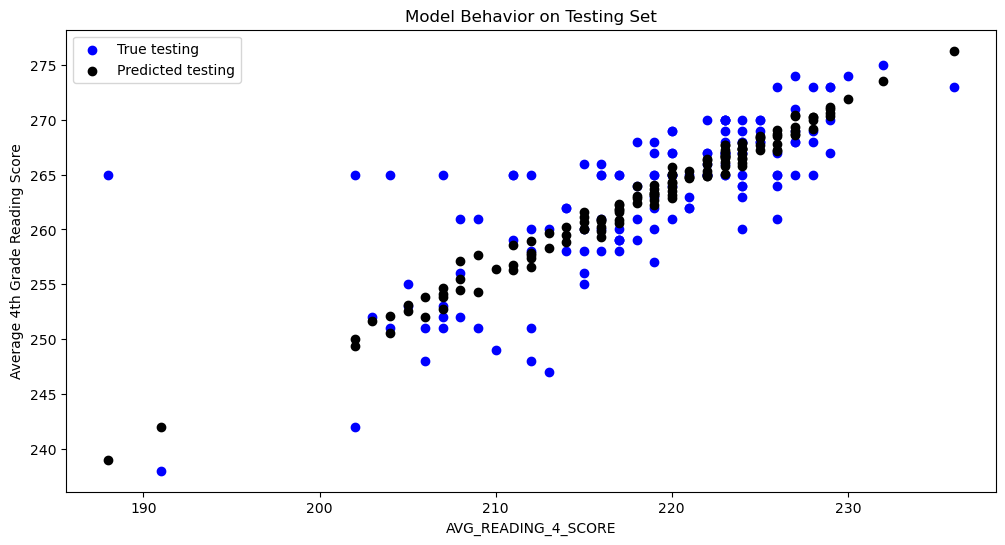

In [84]:
# @@@ 14


col_name = 'AVG_READING_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Reading Score')
plt.title("Model Behavior on Testing Set")